In [1]:
import pandas as pd
import numpy as np
import sys  
from __future__ import print_function
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Pooneh\AppData\Roaming\Python\Python27\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data_final = pd.read_csv("final_data.csv")

In [3]:
data_residential = data_final[data_final['Primary Property Type - Self Selected'] =='Residential']

In [4]:
data_residential.shape

(5745, 17)

In [5]:
data_final.shape

(6412, 17)

In [6]:
y_residential = data_residential['Weather Normalized Site EUI (kBtu/ft²)']

In [7]:
X_residential = data_residential[['BuiltFAR', 'YearBuilt',
       'DOF Property Floor Area (ft²)', 'LotType', 'ProxCode', 'NumFloors', 'LotArea','Oil','Diesel','Water', 'Gas', 'Electricity']]

In [8]:
X_train_residential, X_test_residential, y_train_residential, y_test_residential = train_test_split(X_residential,
                           y_residential, test_size = 0.3, random_state =999)

In [9]:
regressor = RandomForestRegressor()
gr = GridSearchCV(regressor, param_grid={'max_depth': range(1,100)})
rf_gr = gr.fit(X_train_residential, y_train_residential)
print (rf_gr.best_params_)

{'max_depth': 5}


In [10]:
rf_gr.score(X_test_residential, y_test_residential)

0.18822490485951937

In [11]:
forest = regressor.fit(X_train_residential, y_train_residential)
pred_y = regressor.predict(X_test_residential)


In [13]:
w = []
w = y_test_residential

In [14]:
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

In [15]:
print("Feature ranking:")
for f in range(X_residential.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, X_residential.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature BuiltFAR (0.206668)
2. feature DOF Property Floor Area (ft²) (0.185848)
3. feature YearBuilt (0.174020)
4. feature LotArea (0.158609)
5. feature NumFloors (0.089812)
6. feature Electricity (0.086754)
7. feature LotType (0.036418)
8. feature ProxCode (0.028474)
9. feature Gas (0.016607)
10. feature Oil (0.014222)
11. feature Water (0.002569)
12. feature Diesel (0.000000)


In [16]:

reload(sys)  
sys.setdefaultencoding('utf8')

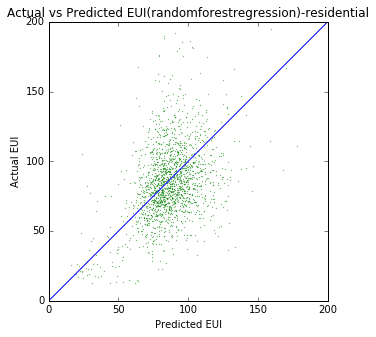

In [20]:

#import plotl
plt.figure(figsize=(5,5))
plt.plot(range(0,200,1), range(0,200, 1))

plt.scatter(pred_y, w, s = 0.05, color='g', alpha=1)

plt.title('Actual vs Predicted EUI(randomforestregression)-residential')

# y label
plt.ylabel('Actual EUI')

# x label
plt.xlabel('Predicted EUI')
plt.xlim(0, 200)
plt.ylim(0, 200)
plt.show()